In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [84]:
from google.colab import files
uploaded = files.upload()

Saving labelledData.csv to labelledData (1).csv


In [206]:
import io
df = pd.read_csv(io.BytesIO(uploaded['labelledData.csv']))

In [207]:
df.drop(df.filter(regex="Unnamed").columns, axis=1, inplace=True)
df.head(10)

,Carbon,Methane,Nitrogen,FGas,Risk
0,517.75,4776.82,179.70,80.88,1.0
1,500.22,2651.58,169.34,63.24,1.0
2,414.50,2312.60,123.72,54.64,1.0
3,211.92,1056.19,55.59,21.74,1.0
4,202.14,986.20,55.52,21.65,1.0
5,165.92,869.41,55.04,18.35,1.0
6,135.27,826.90,45.10,16.78,1.0
7,118.56,644.11,44.48,15.61,1.0
8,86.56,585.71,30.95,12.51,1.0
9,81.96,572.46,27.98,12.07,1.0


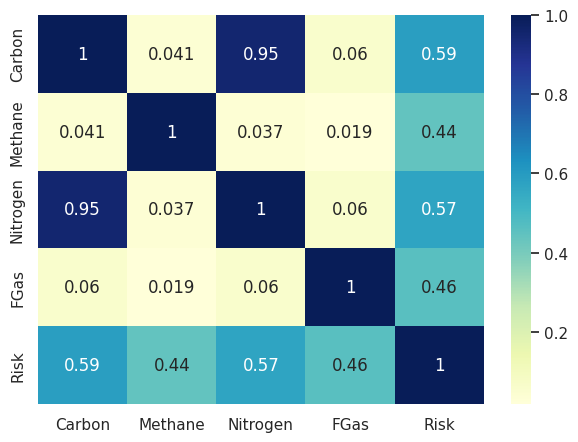

,Carbon,Methane,Nitrogen,FGas,Risk
Carbon,1.000000,0.040891,0.953339,0.059727,0.586004
Methane,0.040891,1.000000,0.036753,0.018603,0.443381
Nitrogen,0.953339,0.036753,1.000000,0.059942,0.569405
FGas,0.059727,0.018603,0.059942,1.000000,0.462020
Risk,0.586004,0.443381,0.569405,0.462020,1.000000


In [208]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
df.corr()

In [157]:
fdf = df[['Carbon','Methane']].copy()
fdf['Label'] = df['Carbon'] + df['Methane']
# ndf.head()
# ndf.to_csv('nn.csv')
# from google.colab import files
# files.download("nn.csv")
ndf = fdf.dropna()

ndf.head(10)
ndf.shape

(13762, 3)

In [158]:
ndf.head(10)

,Carbon,Methane,Label
0,517.75,4776.82,5294.57
1,500.22,2651.58,3151.80
2,414.50,2312.60,2727.10
3,211.92,1056.19,1268.11
4,202.14,986.20,1188.34
5,165.92,869.41,1035.33
6,135.27,826.90,962.17
7,118.56,644.11,762.67
8,86.56,585.71,672.27
9,81.96,572.46,654.42


,Carbon,Methane,Label
Carbon,1.000000,0.040891,0.153644
Methane,0.040891,1.000000,0.993582
Label,0.153644,0.993582,1.000000


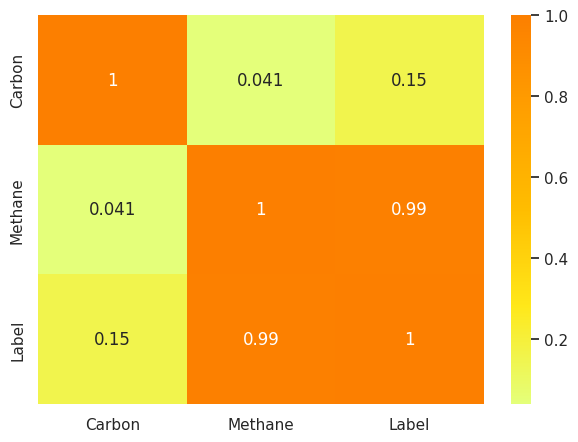

In [209]:
# correlation plot
corr = ndf.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
ndf.corr()

In [160]:
x = ndf.drop(['Label'], axis=1).values

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the DataFrame using the scaler
normalized_df = pd.DataFrame(scaler.fit_transform(x), columns=['Carbon','Methane'])

# print the normalized DataFrame
normalized_df.head(10)

,Carbon,Methane
0,0.763722,0.526259
1,0.737864,0.322427
2,0.611420,0.289915
3,0.312599,0.169412
4,0.298172,0.162699
5,0.244745,0.151498
6,0.199534,0.147421
7,0.174885,0.129890
8,0.127683,0.124288
9,0.120897,0.123018


<ipython-input-210-82c0b0c006c6>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-210-82c0b0c006c6>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



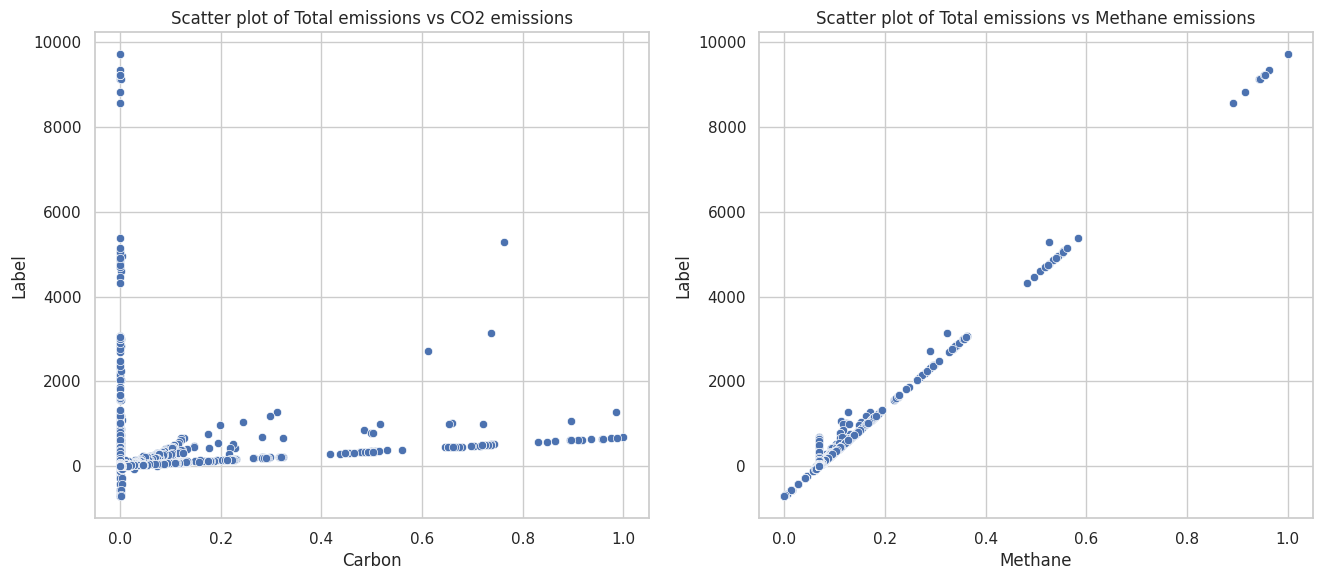

(Scatter({
     'marker': {'color': 'rgba(152, 0, 0, .8)'},
     'mode': 'markers',
     'name': 'train',
     'x': array([517.75, 500.22, 414.5 , ...,   0.  ,   0.  ,   0.  ]),
     'y': array([5294.57, 3151.8 , 2727.1 , ...,    0.  ,    0.  ,    0.  ])
 }),
 Scatter({
     'marker': {'color': 'rgba(0, 152, 0, .8)'},
     'mode': 'lines+markers',
     'name': 'prediction',
     'x': array([517.75, 500.22, 414.5 , ...,   0.  ,   0.  ,   0.  ]),
     'y': array([5294.57, 3151.8 , 2727.1 , ...,    0.  ,    0.  ,    0.  ])
 }))

In [210]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x=normalized_df['Carbon'],y=ndf['Label'],data=ndf,palette='magma',ax=ax)
ax.set_title('Scatter plot of Total emissions vs CO2 emissions')

ax = f.add_subplot(122)
sns.scatterplot(x=normalized_df['Methane'],y=ndf['Label'],data=ndf,palette='viridis')
ax.set_title('Scatter plot of Total emissions vs Methane emissions')
plt.show()



In [169]:
X = normalized_df.values
y = ndf['Label'].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [171]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [172]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

array([ -710.17,   677.93, 10426.4 ])

In [173]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.562e+31
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:30:59   Log-Likelihood:             2.3853e+05
No. Observations:                9633   AIC:                        -4.771e+05
Df Residuals:                    9630   BIC:                        -4.770e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -710.1700   1.14e-13  -6.22e+15      0.0

In [176]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-214-723b49e70e34>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




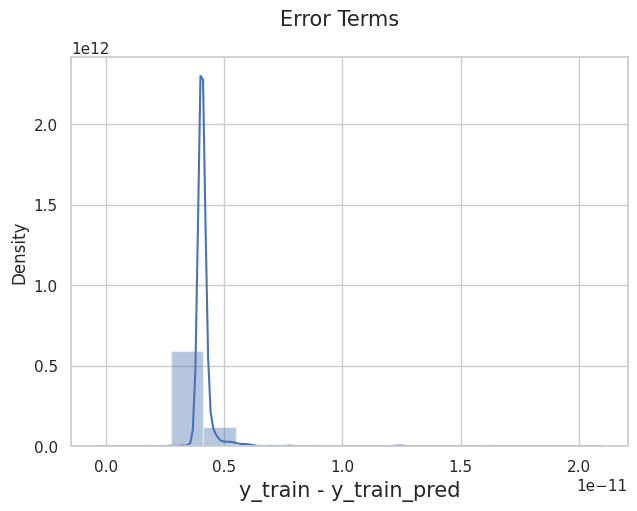

In [214]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()


In [179]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared

1.0

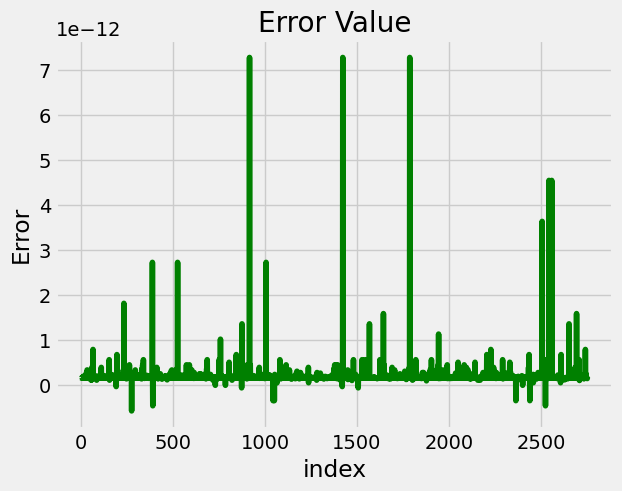

In [61]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [62]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [63]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 1.2642184485184344e-25
r square : 1.0


In [186]:

##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)


,Actual,Predicted
0,16.12,1.612000e+01
1,9.49,9.490000e+00
2,0.00,-4.040787e-12
3,0.00,-4.040787e-12
4,10.42,1.042000e+01
5,99.76,9.976000e+01
6,0.06,6.000000e-02
7,6.22,6.220000e+00
8,2.81,2.810000e+00
9,0.03,3.000000e-02


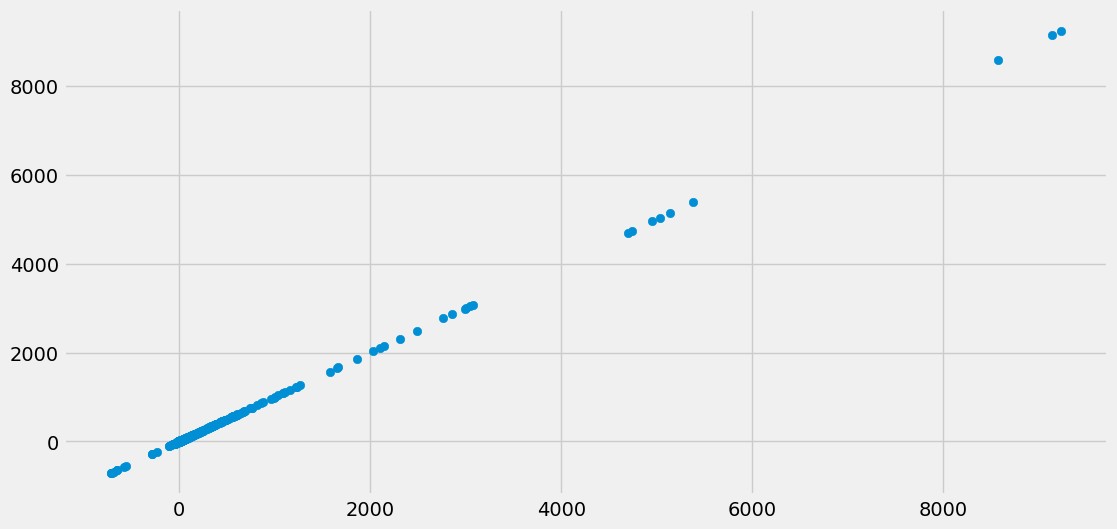

In [187]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
plt.show()


<ipython-input-200-69a071ae9fb9>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of Emissions')

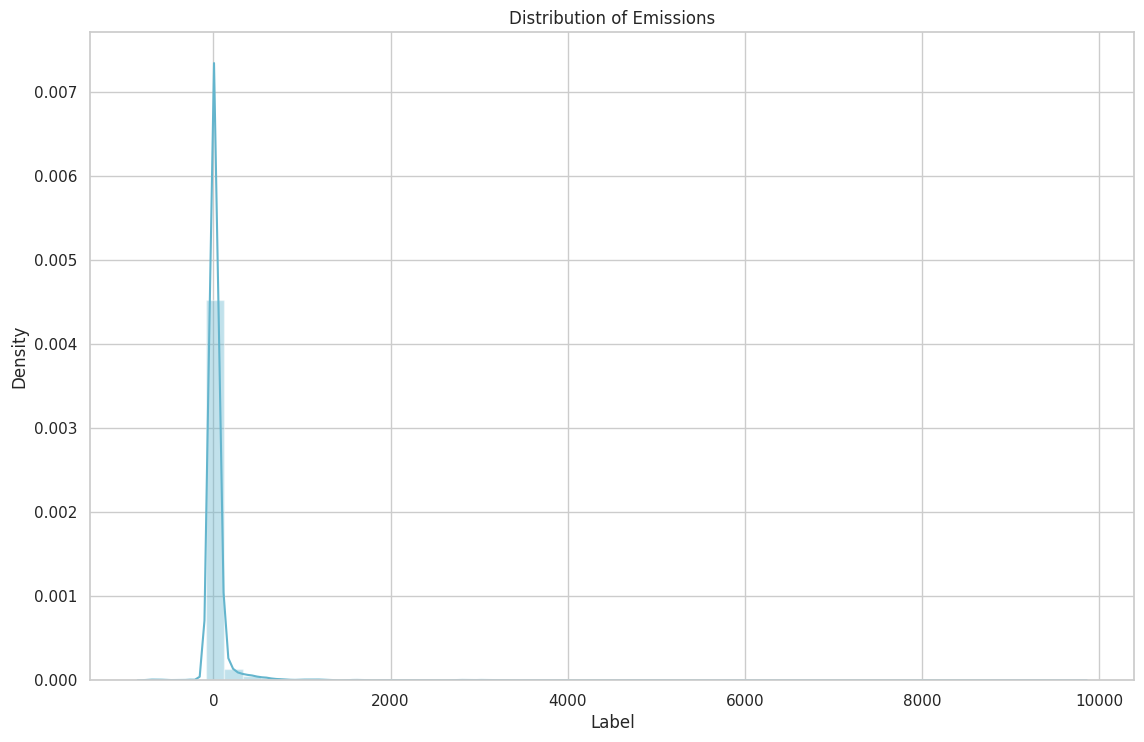

In [200]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(ndf['Label'], kde = True, color = 'c')
plt.title('Distribution of Emissions')
